In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

In [2]:
oba = pd.read_csv('ObamaWebsiteAB.csv')
oba.head()

,webpage,visitmin
0,Original,4.632743
1,Original,2.799878
2,Original,3.890012
3,Original,3.576236
4,Original,4.037903


In [17]:
oba = oba.pivot(columns='webpage', values='visitmin')
oba = oba.fillna(0)
oba

webpage,Change,Family,Original,Video
0,0.000000,0.000000,4.632743,0.000000
1,0.000000,0.000000,2.799878,0.000000
2,0.000000,0.000000,3.890012,0.000000
3,0.000000,0.000000,3.576236,0.000000
4,0.000000,0.000000,4.037903,0.000000
5,0.000000,0.000000,3.540250,0.000000
6,0.000000,0.000000,3.045256,0.000000
7,0.000000,0.000000,4.503746,0.000000
8,0.000000,0.000000,3.193533,0.000000
9,0.000000,0.000000,4.155718,0.000000


In [3]:
# 不对不对，上诉的pivot有点暴力，我们希望的是feature+category，基本类似原表，但需要改一下column的顺序
oba = pd.read_csv('ObamaWebsiteAB.csv')
oba = oba[['visitmin', 'webpage']]
oba.head()

,visitmin,webpage
0,4.632743,Original
1,2.799878,Original
2,3.890012,Original
3,3.576236,Original
4,4.037903,Original


In [4]:
# how many examples we have for eeach webpage
oba['webpage'].value_counts()

Family      16
Original    14
Video       12
Change       6
Name: webpage, dtype: int64

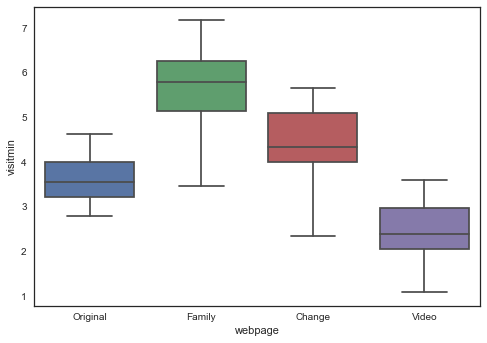

In [5]:
# 1st plot - boxplot, using the pandas plot function 不能scatter因为我们只有一个value
sns.boxplot(x='webpage', y='visitmin', data=oba)

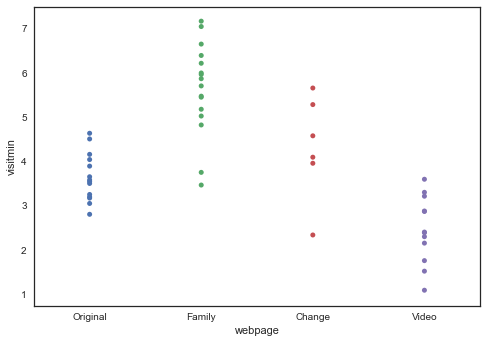

In [6]:
# 2nd plot - stripplot, 适合这种单一变量
sns.stripplot(x='webpage', y='visitmin', data=oba)

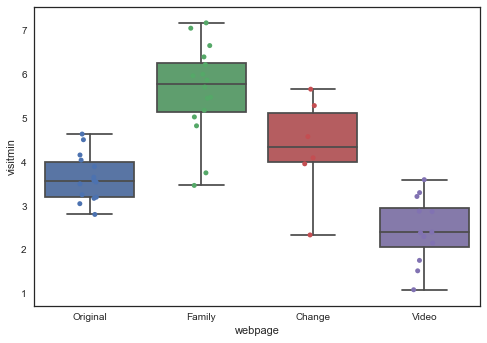

In [7]:
# 3rd plot, combine the sns boxplot & stripplot
ax = sns.boxplot(x='webpage', y='visitmin', data=oba)
ax = sns.stripplot(x='webpage', y='visitmin', data=oba, jitter=True, edgecolor='gray')

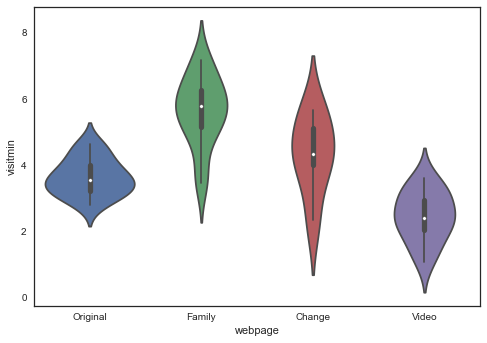

In [8]:
# 4th plot - violin plot, size 感觉添加了也不会变，不管在 jupyter 或者打印出来都不会变
thisplot = sns.violinplot(x='webpage', y='visitmin', data=oba, size=20)
saveplot = thisplot.get_figure()
saveplot.savefig('s.png')

TypeError: slice indices must be integers or None or have an __index__ method

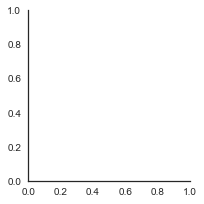

In [10]:
# 5th plot - kdeplot, doesn't work
sns.FacetGrid(oba, hue='webpage') \
   .map(sns.kdeplot, 'visitmin') \
   .add_legend()

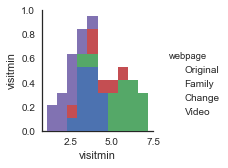

In [11]:
# 6th plot - pairplot, 哈哈哈哈
sns.pairplot(oba, hue='webpage')

TypeError: slice indices must be integers or None or have an __index__ method

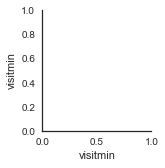

In [12]:
# 7th plot - pairplot w/ dignose being kde? 果然不行
sns.pairplot(oba, hue='webpage', diag_kind='kde')

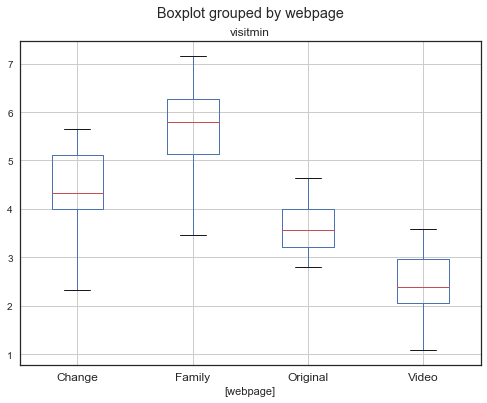

In [16]:
# 8th plot - pandas boxplot, 这里的 figsize 是有用的
oba.boxplot(by='webpage', figsize=(8,6))

到此为止啦，其他的如andrews_curves和parallel_coordinates不大适合这个数据集